In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norms  = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norms] = diabetes[cols_to_norms].apply(lambda x: (x-x.min())/ (x.max()- x.min()) )

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age') 

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

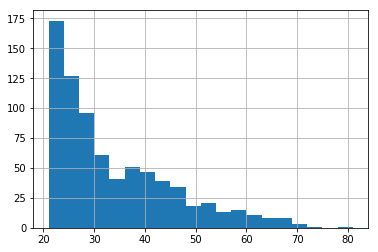

In [14]:
diabetes['Age'].hist(bins=20)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,70,80])

In [18]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [19]:
#Train test split

In [20]:
x_data = diabetes.drop('Class',axis=1)

In [21]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [22]:
labels = diabetes['Class']

In [24]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=42)

In [29]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmptxye88dt', '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600}


In [32]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmptxye88dt/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 520.729
INFO:tensorflow:loss = 5.1511, step = 101 (0.197 sec)
INFO:tensorflow:global_step/sec: 543.356
INFO:tensorflow:loss = 5.37862, step = 201 (0.186 sec)
INFO:tensorflow:global_step/sec: 519.281
INFO:tensorflow:loss = 5.10582, step = 301 (0.191 sec)
INFO:tensorflow:global_step/sec: 480.995
INFO:tensorflow:loss = 5.83982, step = 401 (0.209 sec)
INFO:tensorflow:global_step/sec: 436.128
INFO:tensorflow:loss = 4.57813, step = 501 (0.228 sec)
INFO:tensorflow:global_step/sec: 495.256
INFO:tensorflow:loss = 3.83691, step = 601 (0.201 sec)
INFO:tensorflow:global_step/sec: 337.881
INFO:tensorflow:loss = 4.37319, step = 701 (0.297 sec)
INFO:tensorflow:global_step/sec: 451.16
INFO:tensorflow:loss = 5.52543, step = 801 (0.223 sec)
INFO:tensorflow:global_step/sec: 448.076
INFO:tensorflow:loss = 4.74508, s

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [34]:
model.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-09-01-05:19:16
INFO:tensorflow:Restoring parameters from /tmp/tmptxye88dt/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.66141737,
 'auc': 0.75214565,
 'auc_precision_recall': 0.58443999,
 'average_loss': 0.5534485,
 'global_step': 1000,
 'label/mean': 0.33858266,
 'loss': 5.4067659,
 'prediction/mean': 0.37700492}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [37]:
predictions = list(model.predict(input_fn=pred_input_func))

INFO:tensorflow:Restoring parameters from /tmp/tmptxye88dt/model.ckpt-1000


predictions

In [38]:
predictions

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.58920693], dtype=float32),
  'logits': array([ 0.36068785], dtype=float32),
  'probabilities': array([ 0.41079307,  0.58920693], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.1651583], dtype=float32),
  'logits': array([-1.62033772], dtype=float32),
  'probabilities': array([ 0.83484173,  0.1651583 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.20818475], dtype=float32),
  'logits': array([-1.33590221], dtype=float32),
  'probabilities': array([ 0.79181528,  0.20818475], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.44470349], dtype=float32),
  'logits': array([-0.22209454], dtype=float32),
  'probabilities': array([ 0.55529654,  0.44470349], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [39]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpurrovi2e', '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600}


In [40]:
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [41]:
embedded_group_col= tf.feature_column.embedding_column(assigned_group,dimension=4)

In [42]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_col, age_bucket]

In [50]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp6rxnohs5', '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp6rxnohs5/model.ckpt.
INFO:tensorflow:loss = 6.98963, step = 1
INFO:tensorflow:global_step/sec: 410.206
INFO:tensorflow:loss = 4.25166, step = 101 (0.247 sec)
INFO:tensorflow:global_step/sec: 468.349
INFO:tensorflow:loss = 7.49752, step = 201 (0.212 sec)
INFO:tensorflow:global_step/sec: 476.982
INFO:tensorflow:loss = 4.17806, step = 301 (0.209 sec)
INFO:tensorflow:global_step/sec: 486.692
INFO:tensorflow:loss = 4.72179, step = 401 (0.209 sec)
INFO:tensorflow:global_step/sec: 472.072
INFO:tensorflow:loss = 6.4651, step = 501 (0.212 sec)
INFO:tensorflow:globa

In [51]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,shuffle=False)

In [52]:
dnn_model.evaluate(input_fn=eval_func,steps=100)

INFO:tensorflow:Starting evaluation at 2018-09-01-05:41:12
INFO:tensorflow:Restoring parameters from /tmp/tmp6rxnohs5/model.ckpt-1000
INFO:tensorflow:Evaluation [1/100]
INFO:tensorflow:Evaluation [2/100]
INFO:tensorflow:Evaluation [3/100]
INFO:tensorflow:Evaluation [4/100]
INFO:tensorflow:Evaluation [5/100]
INFO:tensorflow:Evaluation [6/100]
INFO:tensorflow:Evaluation [7/100]
INFO:tensorflow:Evaluation [8/100]
INFO:tensorflow:Evaluation [9/100]
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [11/100]
INFO:tensorflow:Evaluation [12/100]
INFO:tensorflow:Evaluation [13/100]
INFO:tensorflow:Evaluation [14/100]
INFO:tensorflow:Evaluation [15/100]
INFO:tensorflow:Evaluation [16/100]
INFO:tensorflow:Evaluation [17/100]
INFO:tensorflow:Evaluation [18/100]
INFO:tensorflow:Evaluation [19/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [21/100]
INFO:tensorflow:Evaluation [22/100]
INFO:tensorflow:Evaluation [23/100]
INFO:tensorflow:Evaluation [24/100]
INFO:tensor

{'accuracy': 0.70866144,
 'accuracy_baseline': 0.66141737,
 'auc': 0.76955289,
 'auc_precision_recall': 0.60606325,
 'average_loss': 0.58022541,
 'global_step': 1000,
 'label/mean': 0.33858266,
 'loss': 5.6683559,
 'prediction/mean': 0.33255759}

In [53]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [54]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-09-01-05:41:18
INFO:tensorflow:Restoring parameters from /tmp/tmp6rxnohs5/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-09-01-05:41:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.708661, accuracy_baseline = 0.661417, auc = 0.769553, auc_precision_recall = 0.606063, average_loss = 0.580225, global_step = 1000, label/mean = 0.338583, loss = 5.66836, prediction/mean = 0.332558


{'accuracy': 0.70866144,
 'accuracy_baseline': 0.66141737,
 'auc': 0.76955289,
 'auc_precision_recall': 0.60606325,
 'average_loss': 0.58022541,
 'global_step': 1000,
 'label/mean': 0.33858266,
 'loss': 5.6683559,
 'prediction/mean': 0.33255759}